In [16]:
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import numpy as np
import time
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
from astropy.io import fits
%matplotlib inline

In [17]:
db_path = '../../data/kpf_ts_oct2024_v3.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path, base_dir= '/data/L2')

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /data/kpf_ts_oct2024_v3.db
INFO: Base data directory: /data/L2
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 33057 obs x 1214 cols over 57 days in 20240901-20241027; updated 2025-02-27 03:47:04


In [18]:
def rank_array(arr):
    sorted_indices = {num: rank for rank, num in enumerate(sorted(arr), start=1)}
    return [sorted_indices[num] for num in arr]

# Etalon RV for the SCI1 Fiber Green Wavelengths

In [50]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (100, 135):
    unique_cols.add(f'RV{i}')
unique_cols.add('CCFW00')
unique_cols.add('CCFW01')
unique_cols.add('CCFW02')
unique_cols.add('CCFW03')
unique_cols.add('CCFW04')
unique_cols.add('CCFW05')
unique_cols.add('CCFW06')
unique_cols.add('CCFW07')
unique_cols.add('CCFW08')
unique_cols.add('CCFW09')
for i in range(10, 35):
    unique_cols.add(f'CCFW{i}')

In [51]:
sci_1_green_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_1_green_df = sci_1_green_df.drop(columns=['NOTJUNK'])
sci_1_green_df = sci_1_green_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_1_green_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_1_green_df.iloc[:, 2:] = sci_1_green_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_1_green_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_1_green_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_1_green_df = pd.concat([sci_1_green_df['DATE-MID'], sci_1_green_df['ObsID'],sci_1_green_df[rv_columns], sci_1_green_df[ccfw_columns]], axis=1)
sci_1_green_df['DATE-MID'] = pd.to_datetime(sci_1_green_df['DATE-MID'])
sci_1_green_df

DATE-MID                 ObsID RV100 RV101 RV102 RV103  \
0    2024-10-01 01:31:52.415  KP.20241001.05482.41   0.0   0.0   0.0   0.0   
1    2024-10-01 01:33:40.948  KP.20241001.05590.94   0.0   0.0   0.0   0.0   
2    2024-10-01 01:35:29.660  KP.20241001.05699.65   0.0   0.0   0.0   0.0   
3    2024-10-01 02:52:11.874  KP.20241001.10301.86   0.0   0.0   0.0   0.0   
4    2024-10-01 02:54:00.323  KP.20241001.10410.31   0.0   0.0   0.0   0.0   
...                      ...                   ...   ...   ...   ...   ...   
2557 2024-10-27 17:33:32.853  KP.20241027.63182.84   0.0   0.0   0.0   0.0   
2558 2024-10-27 17:35:21.291  KP.20241027.63291.25   0.0   0.0   0.0   0.0   
2559 2024-10-27 18:31:40.930  KP.20241027.66670.90   0.0   0.0   0.0   0.0   
2560 2024-10-27 18:33:29.617  KP.20241027.66779.59   0.0   0.0   0.0   0.0   
2561 2024-10-27 18:35:18.259  KP.20241027.66888.25   0.0   0.0   0.0   0.0   

     RV104 RV105 RV106 RV107  ... CCFW25 CCFW26 CCFW27 CCFW28 CCFW29 CCFW30  \
0      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
1      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
3      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
4      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
...    ...   ...   ...   ...  ...    ...    ...    ...    ...    ...    ...   
2557   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2558   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2559   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2560   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2561   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   

     CCFW31 CCFW32 CCFW33 CCFW34  
0       1.0    1.0    1.0    1.0  
1       1.0    1.0    1.0    1.0  
2       1.0    1.0    1.0    1.0  
3       1.0    1.0    1.0    1.0  
4       1.0    1.0    1.0    1.0  
...     ...    ...    ...    ...  
2557    1.0    1.0    1.0    1.0  
2558    1.0    1.0    1.0    1.0  
2559    1.0    1.0    1.0    1.0  
2560    1.0    1.0    1.0    1.0  
2561    1.0    1.0    1.0    1.0  

[2562 rows x 72 columns]

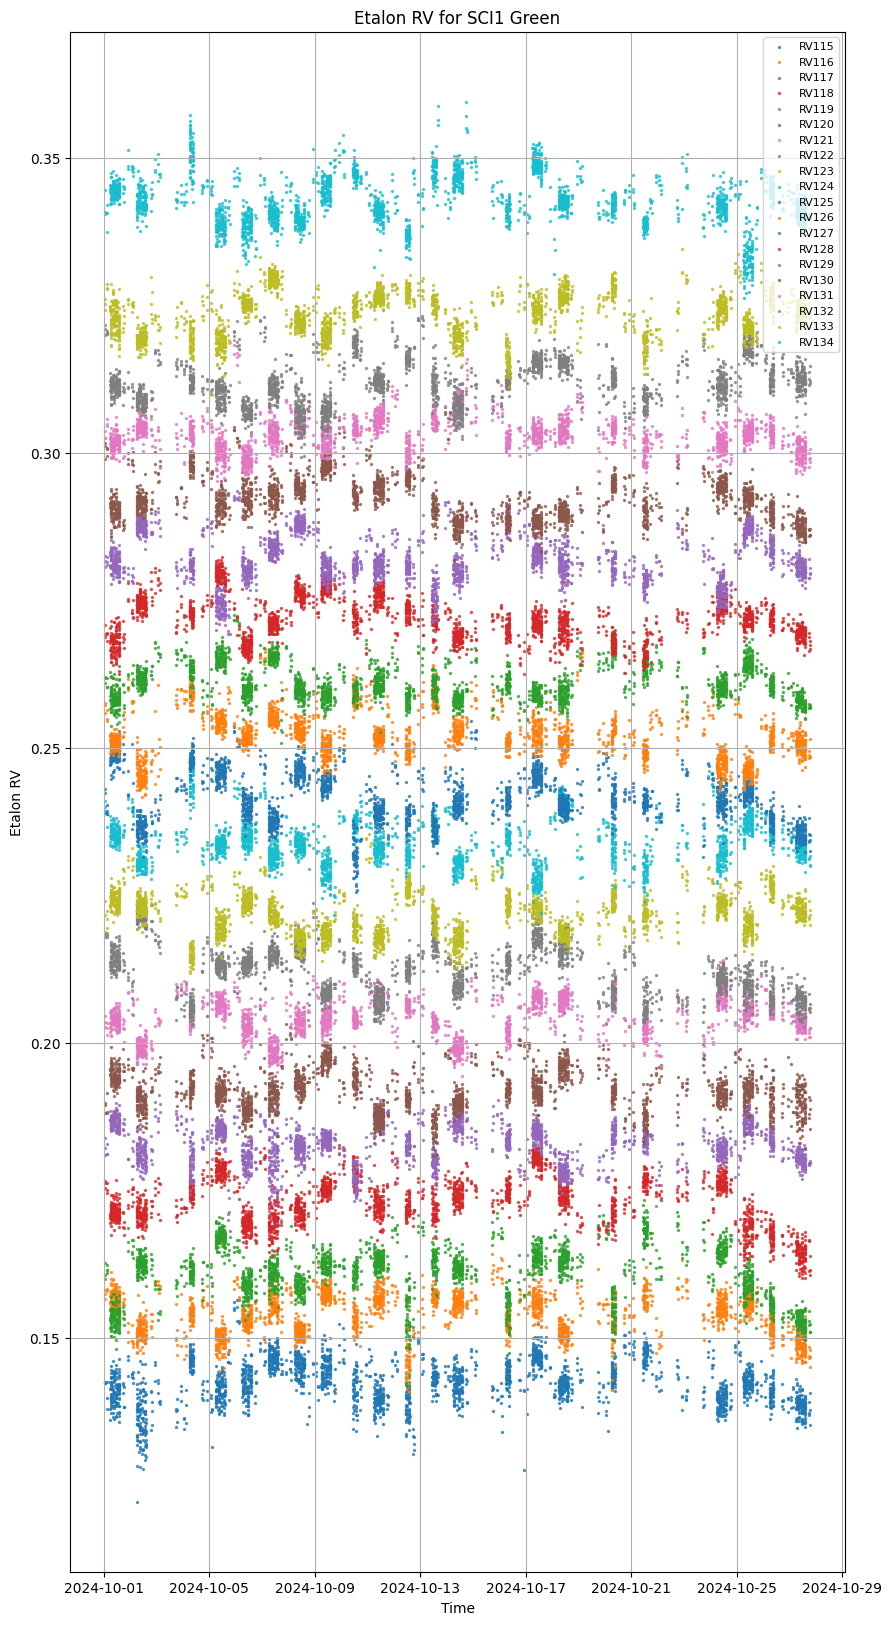

In [52]:
plt.figure(figsize=(10, 20)) 
for i in range(35):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_1_green_df[weight_col] != 0
    times = sci_1_green_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_1_green_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI1 Green")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [22]:
rms_results = []
for i in range(35):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_1_green_df.loc[sci_1_green_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([i, rv_col, rms])

sci_1_green_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_1_green_overall_rms = np.min(sci_1_green_rms_df["RMS"])
sci_1_green_rms_df["RMS Factor"] = (sci_1_green_rms_df["RMS"] - sci_1_green_overall_rms)/sci_1_green_overall_rms + 1
sci_1_green_rms_df["RMS Rank"] = rank_array(sci_1_green_rms_df["RMS"] - sci_1_green_overall_rms)
sci_1_green_rms_df

Order RV Col       RMS  RMS Factor  RMS Rank
0      15  RV115  0.008492    1.692140         9
1      16  RV116  0.006953    1.385543         3
2      17  RV117  0.010261    2.044750        20
3      18  RV118  0.008221    1.638180         8
4      19  RV119  0.007912    1.576725         7
5      20  RV120  0.008789    1.751342        13
6      21  RV121  0.006564    1.307981         2
7      22  RV122  0.008771    1.747902        12
8      23  RV123  0.009154    1.824071        17
9      24  RV124  0.007318    1.458274         4
10     25  RV125  0.009631    1.919223        19
11     26  RV126  0.008871    1.767816        14
12     27  RV127  0.009460    1.885135        18
13     28  RV128  0.008749    1.743384        11
14     29  RV129  0.009088    1.810923        15
15     30  RV130  0.008599    1.713450        10
16     31  RV131  0.007383    1.471196         5
17     32  RV132  0.009102    1.813788        16
18     33  RV133  0.007560    1.506456         6
19     34  RV134  0.005018    1.000000         1

In [23]:
sci_1_green_max_order = sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmax(), "Order"]
sci_1_green_min_order = sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_1_green_max_order}')
print(f'Min: {sci_1_green_min_order}')

Max: 17
Min: 34


# Etalon RV for the SCI1 Fiber Red Wavelengths

In [24]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (135, 167):
    unique_cols.add(f'RV{i}')
for i in range(35, 67):
    unique_cols.add(f'CCFW{i}')

In [25]:
sci_1_red_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_1_red_df = sci_1_red_df.drop(columns=['NOTJUNK'])
sci_1_red_df = sci_1_red_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_1_red_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_1_red_df.iloc[:, 2:] = sci_1_red_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_1_red_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_1_red_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_1_red_df = pd.concat([sci_1_red_df['DATE-MID'], sci_1_red_df['ObsID'],sci_1_red_df[rv_columns], sci_1_red_df[ccfw_columns]], axis=1)
sci_1_red_df['DATE-MID'] = pd.to_datetime(sci_1_red_df['DATE-MID'])
sci_1_red_df

DATE-MID                 ObsID RV135     RV136     RV137  \
0    2024-10-01 01:31:52.415  KP.20241001.05482.41   0.0  0.001191  0.000214   
1    2024-10-01 01:33:40.948  KP.20241001.05590.94   0.0  0.005567 -0.002871   
2    2024-10-01 01:35:29.660  KP.20241001.05699.65   0.0  0.004063  0.006249   
3    2024-10-01 02:52:11.874  KP.20241001.10301.86   0.0  0.003926  0.003284   
4    2024-10-01 02:54:00.323  KP.20241001.10410.31   0.0   0.00427 -0.000927   
...                      ...                   ...   ...       ...       ...   
2557 2024-10-27 17:33:32.853  KP.20241027.63182.84   0.0  0.006196    0.0009   
2558 2024-10-27 17:35:21.291  KP.20241027.63291.25   0.0  0.001756 -0.000154   
2559 2024-10-27 18:31:40.930  KP.20241027.66670.90   0.0 -0.000527  -0.00058   
2560 2024-10-27 18:33:29.617  KP.20241027.66779.59   0.0 -0.001304  0.003124   
2561 2024-10-27 18:35:18.259  KP.20241027.66888.25   0.0  0.003378  0.000452   

         RV138     RV139     RV140     RV141     RV142  ... CCFW57 CCFW58  \
0     0.006135  0.005634  0.005728  0.008083   0.00665  ...    1.0    1.0   
1     0.009463   0.00617  0.007368  0.010692  0.006448  ...    1.0    1.0   
2     0.006425  0.006922  0.006014  0.009121  0.004936  ...    1.0    1.0   
3     0.006687   0.00613  0.007202    0.0035  0.006957  ...    1.0    1.0   
4     0.005227  0.006047  0.005157  0.004617  0.008671  ...    1.0    1.0   
...        ...       ...       ...       ...       ...  ...    ...    ...   
2557  0.000374  0.003102  0.004838  0.001867  0.004039  ...    1.0    1.0   
2558   0.00174  0.004061  0.003558  0.000872  0.001041  ...    1.0    1.0   
2559 -0.001795  0.006243   0.00425  0.006189  0.003572  ...    1.0    1.0   
2560 -0.000057  0.004636   0.00506  0.004551  0.004944  ...    1.0    1.0   
2561  0.000759   0.00231  0.003243   0.00495  0.003013  ...    1.0    1.0   

     CCFW59 CCFW60 CCFW61 CCFW62 CCFW63 CCFW64 CCFW65 CCFW66  
0       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
1       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
3       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
4       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
...     ...    ...    ...    ...    ...    ...    ...    ...  
2557    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2558    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2559    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2560    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2561    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  

[2562 rows x 66 columns]

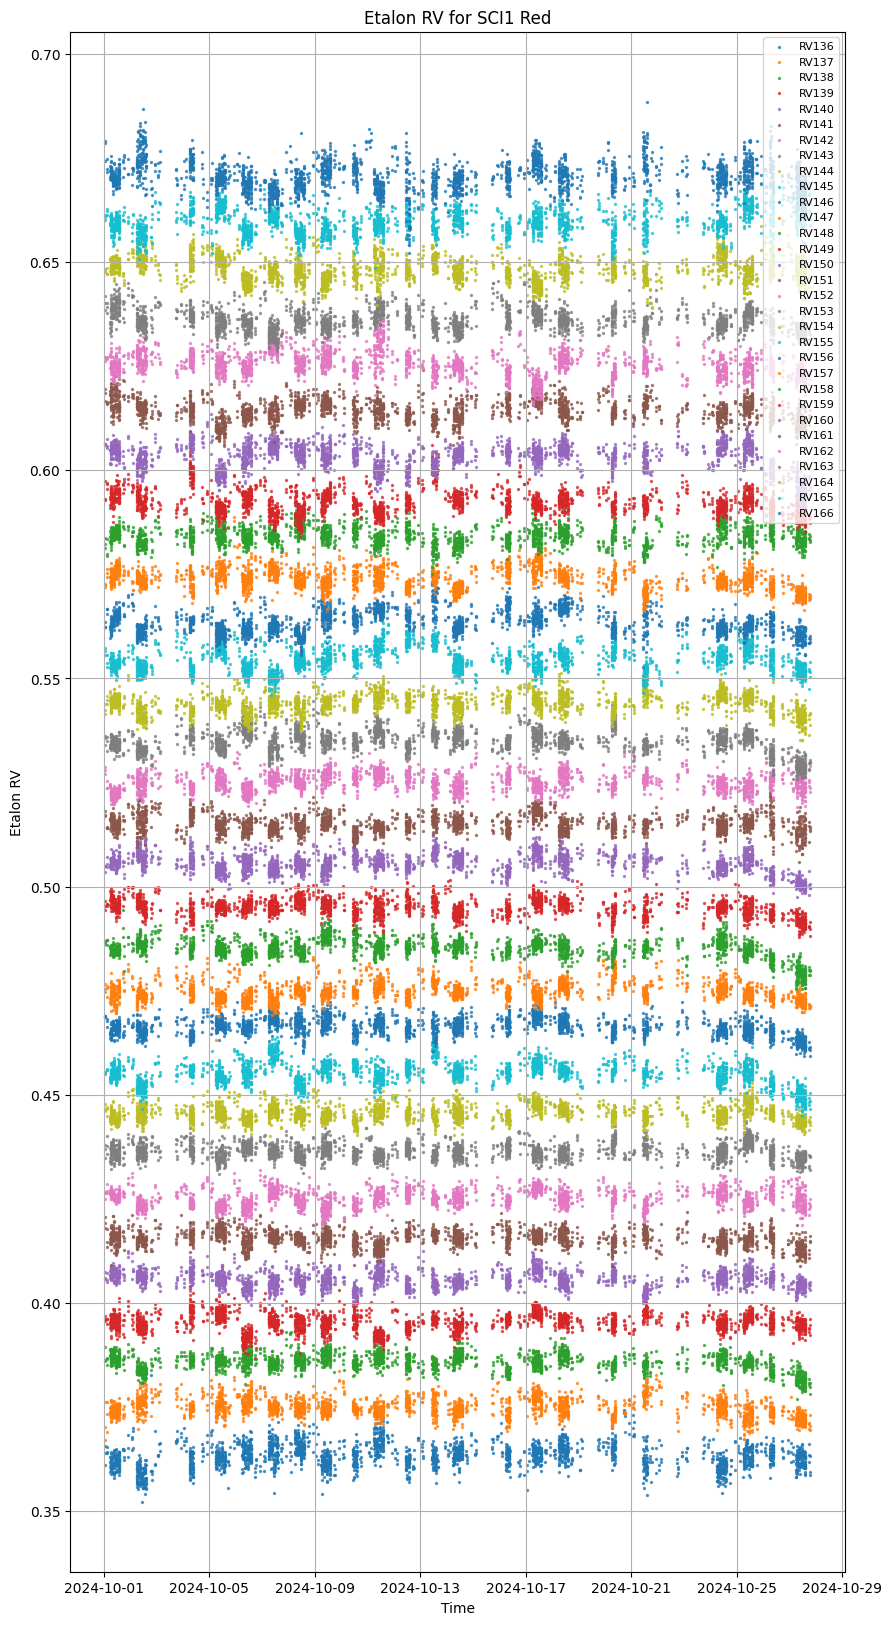

In [26]:
plt.figure(figsize=(10, 20)) 
for i in range(35, 67):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_1_red_df[weight_col] != 0
    times = sci_1_red_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_1_red_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI1 Red")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [27]:
rms_results = []
order = 0
for i in range(35, 67):
    rv_col = f"RV{100 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_1_red_df.loc[sci_1_red_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([order, rv_col, rms])
    order+=1

sci_1_red_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_1_red_overall_rms = np.min(sci_1_red_rms_df["RMS"])
sci_1_red_rms_df["RMS Factor"] = (sci_1_red_rms_df["RMS"] - sci_1_red_overall_rms)/sci_1_red_overall_rms + 1
sci_1_red_rms_df["RMS Rank"] = rank_array(sci_1_red_rms_df["RMS"] - sci_1_red_overall_rms)
sci_1_red_rms_df

Order RV Col       RMS  RMS Factor  RMS Rank
0       1  RV136  0.004395    1.176615         2
1       2  RV137  0.005470    1.464356        12
2       3  RV138  0.006211    1.662812        24
3       4  RV139  0.005799    1.552374        18
4       5  RV140  0.006001    1.606583        22
5       6  RV141  0.005832    1.561336        19
6       7  RV142  0.005493    1.470359        13
7       8  RV143  0.006662    1.783529        27
8       9  RV144  0.005936    1.589083        20
9      10  RV145  0.005979    1.600629        21
10     11  RV146  0.006697    1.792838        28
11     12  RV147  0.005213    1.395526         9
12     13  RV148  0.005735    1.535156        17
13     14  RV149  0.005426    1.452414        11
14     15  RV150  0.006053    1.620367        23
15     16  RV151  0.005497    1.471448        14
16     17  RV152  0.005536    1.481901        15
17     18  RV153  0.005634    1.508178        16
18     19  RV154  0.004521    1.210225         5
19     20  RV155  0.005414    1.449423        10
20     21  RV156  0.004509    1.206931         3
21     22  RV157  0.004678    1.252176         6
22     23  RV158  0.004770    1.276946         7
23     24  RV159  0.003736    1.000000         1
24     25  RV160  0.004516    1.208882         4
25     26  RV161  0.005153    1.379502         8
26     27  RV162  0.006291    1.684058        25
27     28  RV163  0.006509    1.742364        26
28     29  RV164  0.008663    2.319146        29
29     30  RV165  0.010150    2.717284        30
30     31  RV166  0.011136    2.981164        31

In [28]:
sci_1_red_max_order = sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmax(), "Order"]
sci_1_red_min_order = sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_1_red_max_order}')
print(f'Min: {sci_1_red_min_order}')

Max: 31
Min: 24


# Etalon RV for the SCI2 Fiber Green Wavelength

In [29]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (200, 235):
    unique_cols.add(f'RV{i}')
unique_cols.add('CCFW00')
unique_cols.add('CCFW01')
unique_cols.add('CCFW02')
unique_cols.add('CCFW03')
unique_cols.add('CCFW04')
unique_cols.add('CCFW05')
unique_cols.add('CCFW06')
unique_cols.add('CCFW07')
unique_cols.add('CCFW08')
unique_cols.add('CCFW09')
for i in range(10, 35):
    unique_cols.add(f'CCFW{i}')

In [30]:
sci_2_green_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_2_green_df = sci_2_green_df.drop(columns=['NOTJUNK'])
sci_2_green_df = sci_2_green_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_2_green_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_2_green_df.iloc[:, 2:] = sci_2_green_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_2_green_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_2_green_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_2_green_df = pd.concat([sci_2_green_df['DATE-MID'], sci_2_green_df['ObsID'],sci_2_green_df[rv_columns], sci_2_green_df[ccfw_columns]], axis=1)
sci_2_green_df['DATE-MID'] = pd.to_datetime(sci_2_green_df['DATE-MID'])
sci_2_green_df

DATE-MID                 ObsID RV200 RV201 RV202 RV203  \
0    2024-10-01 01:31:52.415  KP.20241001.05482.41   0.0   0.0   0.0   0.0   
1    2024-10-01 01:33:40.948  KP.20241001.05590.94   0.0   0.0   0.0   0.0   
2    2024-10-01 01:35:29.660  KP.20241001.05699.65   0.0   0.0   0.0   0.0   
3    2024-10-01 02:52:11.874  KP.20241001.10301.86   0.0   0.0   0.0   0.0   
4    2024-10-01 02:54:00.323  KP.20241001.10410.31   0.0   0.0   0.0   0.0   
...                      ...                   ...   ...   ...   ...   ...   
2557 2024-10-27 17:33:32.853  KP.20241027.63182.84   0.0   0.0   0.0   0.0   
2558 2024-10-27 17:35:21.291  KP.20241027.63291.25   0.0   0.0   0.0   0.0   
2559 2024-10-27 18:31:40.930  KP.20241027.66670.90   0.0   0.0   0.0   0.0   
2560 2024-10-27 18:33:29.617  KP.20241027.66779.59   0.0   0.0   0.0   0.0   
2561 2024-10-27 18:35:18.259  KP.20241027.66888.25   0.0   0.0   0.0   0.0   

     RV204 RV205 RV206 RV207  ... CCFW25 CCFW26 CCFW27 CCFW28 CCFW29 CCFW30  \
0      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
1      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
3      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
4      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
...    ...   ...   ...   ...  ...    ...    ...    ...    ...    ...    ...   
2557   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2558   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2559   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2560   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2561   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   

     CCFW31 CCFW32 CCFW33 CCFW34  
0       1.0    1.0    1.0    1.0  
1       1.0    1.0    1.0    1.0  
2       1.0    1.0    1.0    1.0  
3       1.0    1.0    1.0    1.0  
4       1.0    1.0    1.0    1.0  
...     ...    ...    ...    ...  
2557    1.0    1.0    1.0    1.0  
2558    1.0    1.0    1.0    1.0  
2559    1.0    1.0    1.0    1.0  
2560    1.0    1.0    1.0    1.0  
2561    1.0    1.0    1.0    1.0  

[2562 rows x 72 columns]

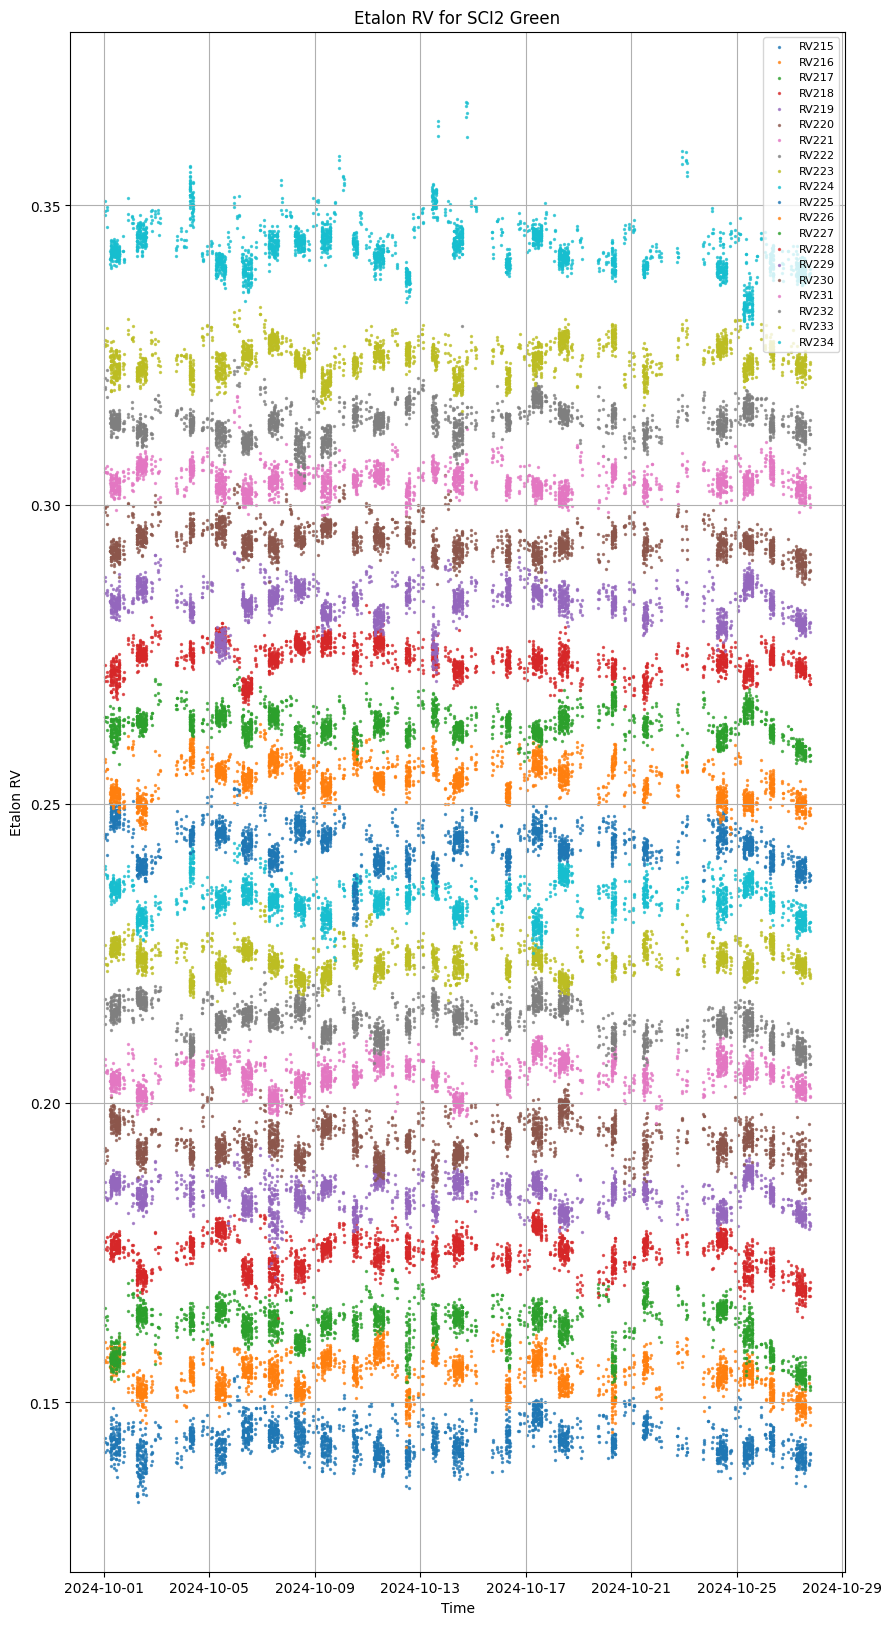

In [31]:
plt.figure(figsize=(10, 20)) 
for i in range(35):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_2_green_df[weight_col] != 0
    times = sci_2_green_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_2_green_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI2 Green")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [32]:
rms_results = []
for i in range(35):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_2_green_df.loc[sci_2_green_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([i, rv_col, rms])

sci_2_green_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_2_green_overall_rms = np.min(sci_2_green_rms_df["RMS"])
sci_2_green_rms_df["RMS Factor"] = (sci_2_green_rms_df["RMS"] - sci_2_green_overall_rms)/sci_2_green_overall_rms + 1
sci_2_green_rms_df["RMS Rank"] = rank_array(sci_2_green_rms_df["RMS"] - sci_2_green_overall_rms)
sci_2_green_rms_df

Order RV Col       RMS  RMS Factor  RMS Rank
0      15  RV215  0.007038    1.414223        15
1      16  RV216  0.006157    1.237103         4
2      17  RV217  0.008327    1.673068        20
3      18  RV218  0.006163    1.238297         5
4      19  RV219  0.005966    1.198659         3
5      20  RV220  0.007161    1.438931        16
6      21  RV221  0.005920    1.189580         2
7      22  RV222  0.006766    1.359520        12
8      23  RV223  0.006776    1.361522        13
9      24  RV224  0.006618    1.329792         9
10     25  RV225  0.007712    1.549671        19
11     26  RV226  0.006723    1.350768        11
12     27  RV227  0.007240    1.454754        17
13     28  RV228  0.006426    1.291138         8
14     29  RV229  0.007324    1.471693        18
15     30  RV230  0.006623    1.330833        10
16     31  RV231  0.006385    1.282980         7
17     32  RV232  0.006918    1.389938        14
18     33  RV233  0.006339    1.273759         6
19     34  RV234  0.004977    1.000000         1

In [33]:
sci_2_green_max_order = sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmax(), "Order"]
sci_2_green_min_order = sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_2_green_max_order}')
print(f'Min: {sci_2_green_min_order}')

Max: 17
Min: 34


# Etalon RV for the SCI2 Fiber Red Wavelength

In [34]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (235, 267):
    unique_cols.add(f'RV{i}')
for i in range(35, 67):
    unique_cols.add(f'CCFW{i}')

In [35]:
sci_2_red_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_2_red_df = sci_2_red_df.drop(columns=['NOTJUNK'])
sci_2_red_df = sci_2_red_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_2_red_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_2_red_df.iloc[:, 2:] = sci_2_red_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_2_red_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_2_red_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_2_red_df = pd.concat([sci_2_red_df['DATE-MID'], sci_2_red_df['ObsID'],sci_2_red_df[rv_columns], sci_2_red_df[ccfw_columns]], axis=1)
sci_2_red_df['DATE-MID'] = pd.to_datetime(sci_2_red_df['DATE-MID'])
sci_2_red_df

DATE-MID                 ObsID RV235     RV236     RV237  \
0    2024-10-01 01:31:52.415  KP.20241001.05482.41   0.0 -0.002657  0.001308   
1    2024-10-01 01:33:40.948  KP.20241001.05590.94   0.0 -0.002064  0.000427   
2    2024-10-01 01:35:29.660  KP.20241001.05699.65   0.0 -0.001393  -0.00172   
3    2024-10-01 02:52:11.874  KP.20241001.10301.86   0.0  -0.00335 -0.003838   
4    2024-10-01 02:54:00.323  KP.20241001.10410.31   0.0  0.000736  0.001663   
...                      ...                   ...   ...       ...       ...   
2557 2024-10-27 17:33:32.853  KP.20241027.63182.84   0.0 -0.005402 -0.006185   
2558 2024-10-27 17:35:21.291  KP.20241027.63291.25   0.0 -0.003535 -0.005516   
2559 2024-10-27 18:31:40.930  KP.20241027.66670.90   0.0 -0.001694 -0.005678   
2560 2024-10-27 18:33:29.617  KP.20241027.66779.59   0.0 -0.003078 -0.006442   
2561 2024-10-27 18:35:18.259  KP.20241027.66888.25   0.0 -0.005655 -0.005382   

         RV238     RV239     RV240     RV241     RV242  ... CCFW57 CCFW58  \
0    -0.000045 -0.000059  0.001715  0.001709 -0.001287  ...    1.0    1.0   
1     0.001516 -0.000086  0.000444  0.003054  0.000652  ...    1.0    1.0   
2    -0.001214  0.000272 -0.000923  0.001029 -0.002569  ...    1.0    1.0   
3    -0.003252 -0.000294  0.000144 -0.004157 -0.001262  ...    1.0    1.0   
4    -0.001917 -0.000642  0.002165 -0.001378  -0.00141  ...    1.0    1.0   
...        ...       ...       ...       ...       ...  ...    ...    ...   
2557 -0.004433 -0.004223 -0.004877 -0.003003 -0.006316  ...    1.0    1.0   
2558 -0.004714 -0.004025 -0.007194 -0.003776 -0.004582  ...    1.0    1.0   
2559 -0.005187 -0.000877 -0.001094 -0.004211 -0.003766  ...    1.0    1.0   
2560 -0.005386 -0.001964  -0.00248 -0.004978 -0.005253  ...    1.0    1.0   
2561 -0.003981 -0.003555 -0.002344 -0.005102 -0.003581  ...    1.0    1.0   

     CCFW59 CCFW60 CCFW61 CCFW62 CCFW63 CCFW64 CCFW65 CCFW66  
0       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
1       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
3       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
4       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
...     ...    ...    ...    ...    ...    ...    ...    ...  
2557    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2558    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2559    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2560    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2561    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  

[2562 rows x 66 columns]

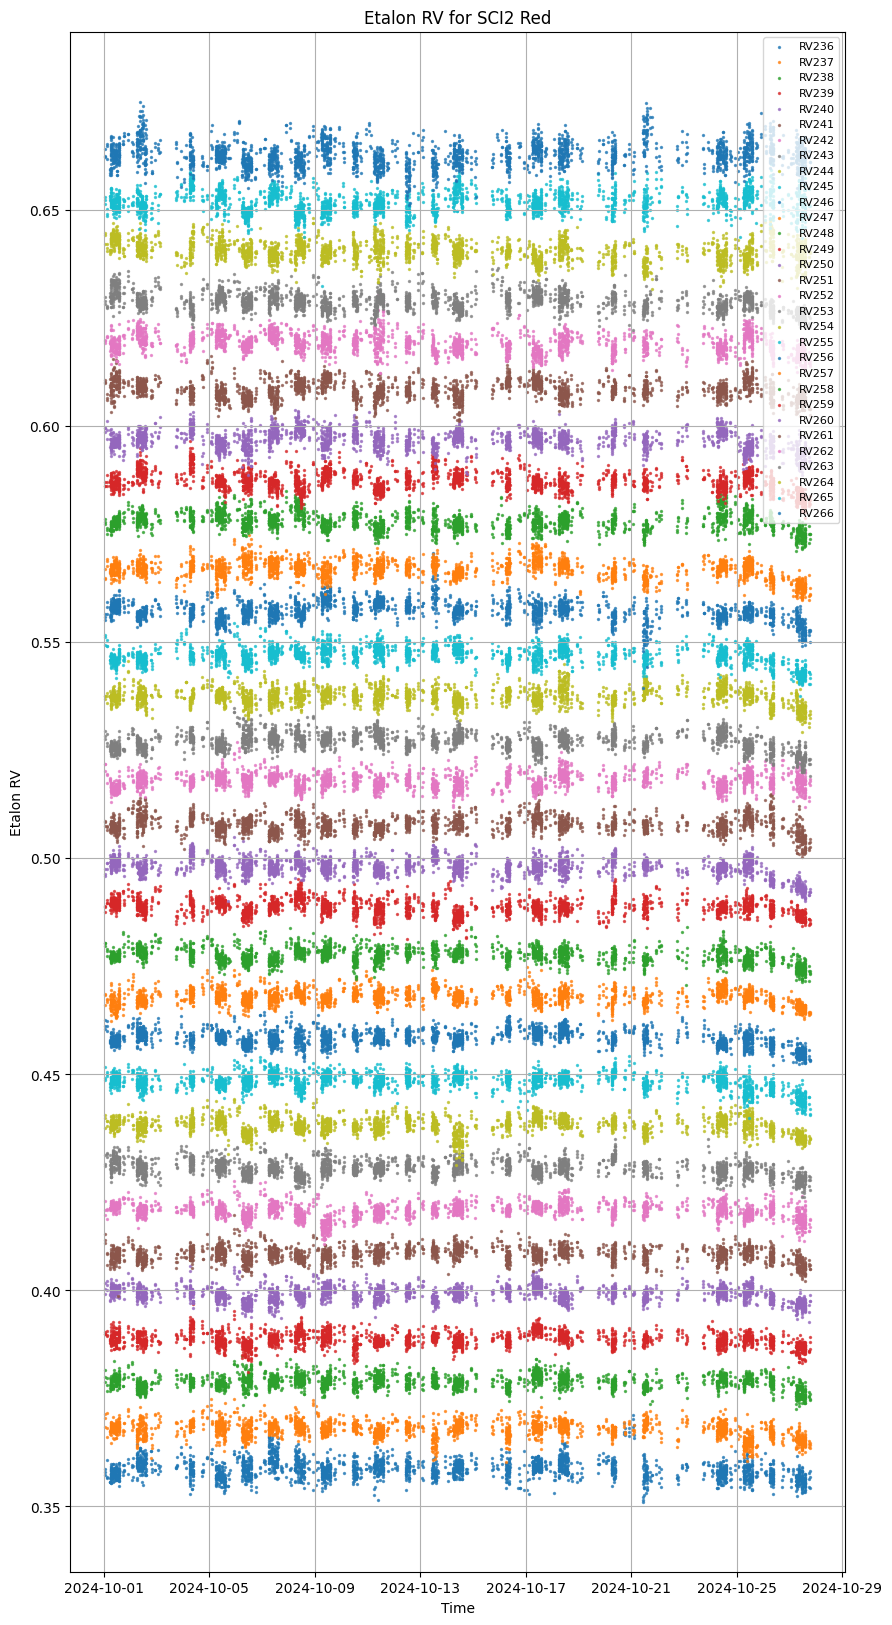

In [36]:
plt.figure(figsize=(10, 20)) 
for i in range(35, 67):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_2_red_df[weight_col] != 0
    times = sci_2_red_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_2_red_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI2 Red")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [37]:
rms_results = []
order = 0
for i in range(35, 67):
    rv_col = f"RV{200 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_2_red_df.loc[sci_2_red_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([order, rv_col, rms])
    order+=1

sci_2_red_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_2_red_overall_rms = np.min(sci_2_red_rms_df["RMS"])
sci_2_red_rms_df["RMS Factor"] = (sci_2_red_rms_df["RMS"] - sci_2_red_overall_rms)/sci_2_red_overall_rms + 1
sci_2_red_rms_df["RMS Rank"] = rank_array(sci_2_red_rms_df["RMS"] - sci_2_red_overall_rms)
sci_2_red_rms_df

Order RV Col       RMS  RMS Factor  RMS Rank
0       1  RV236  0.002618    1.363996        14
1       2  RV237  0.002916    1.519305        20
2       3  RV238  0.001949    1.015526         2
3       4  RV239  0.002098    1.093183         3
4       5  RV240  0.001919    1.000000         1
5       6  RV241  0.002342    1.220238         5
6       7  RV242  0.002403    1.251916         7
7       8  RV243  0.002511    1.308492        11
8       9  RV244  0.002614    1.361797        13
9      10  RV245  0.002558    1.332732        12
10     11  RV246  0.002467    1.285110        10
11     12  RV247  0.002667    1.389575        15
12     13  RV248  0.003043    1.585552        22
13     14  RV249  0.002235    1.164559         4
14     15  RV250  0.002914    1.518399        19
15     16  RV251  0.002940    1.531883        21
16     17  RV252  0.002759    1.437579        17
17     18  RV253  0.003629    1.890557        26
18     19  RV254  0.003169    1.650882        24
19     20  RV255  0.003630    1.891571        27
20     21  RV256  0.003657    1.905213        28
21     22  RV257  0.003686    1.920338        29
22     23  RV258  0.002887    1.504251        18
23     24  RV259  0.003514    1.830926        25
24     25  RV260  0.003911    2.037712        30
25     26  RV261  0.002686    1.399718        16
26     27  RV262  0.002382    1.241164         6
27     28  RV263  0.002405    1.253001         8
28     29  RV264  0.002405    1.253273         9
29     30  RV265  0.003147    1.639891        23
30     31  RV266  0.004127    2.150399        31

In [38]:
sci_2_red_max_order = sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmax(), "Order"]
sci_2_red_min_order = sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_2_red_max_order}')
print(f'Min: {sci_2_red_min_order}')

Max: 31
Min: 5


# Etalon RV for the SCI3 Fiber Green Wavelengths

In [39]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (300, 335):
    unique_cols.add(f'RV{i}')
unique_cols.add('CCFW00')
unique_cols.add('CCFW01')
unique_cols.add('CCFW02')
unique_cols.add('CCFW03')
unique_cols.add('CCFW04')
unique_cols.add('CCFW05')
unique_cols.add('CCFW06')
unique_cols.add('CCFW07')
unique_cols.add('CCFW08')
unique_cols.add('CCFW09')
for i in range(10, 35):
    unique_cols.add(f'CCFW{i}')

In [40]:
sci_3_green_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_3_green_df = sci_3_green_df.drop(columns=['NOTJUNK'])
sci_3_green_df = sci_3_green_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_3_green_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_3_green_df.iloc[:, 2:] = sci_3_green_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_3_green_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_3_green_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_3_green_df = pd.concat([sci_3_green_df['DATE-MID'], sci_3_green_df['ObsID'],sci_3_green_df[rv_columns], sci_3_green_df[ccfw_columns]], axis=1)
sci_3_green_df['DATE-MID'] = pd.to_datetime(sci_3_green_df['DATE-MID'])
sci_3_green_df

DATE-MID                 ObsID RV300 RV301 RV302 RV303  \
0    2024-10-01 01:31:52.415  KP.20241001.05482.41   0.0   0.0   0.0   0.0   
1    2024-10-01 01:33:40.948  KP.20241001.05590.94   0.0   0.0   0.0   0.0   
2    2024-10-01 01:35:29.660  KP.20241001.05699.65   0.0   0.0   0.0   0.0   
3    2024-10-01 02:52:11.874  KP.20241001.10301.86   0.0   0.0   0.0   0.0   
4    2024-10-01 02:54:00.323  KP.20241001.10410.31   0.0   0.0   0.0   0.0   
...                      ...                   ...   ...   ...   ...   ...   
2557 2024-10-27 17:33:32.853  KP.20241027.63182.84   0.0   0.0   0.0   0.0   
2558 2024-10-27 17:35:21.291  KP.20241027.63291.25   0.0   0.0   0.0   0.0   
2559 2024-10-27 18:31:40.930  KP.20241027.66670.90   0.0   0.0   0.0   0.0   
2560 2024-10-27 18:33:29.617  KP.20241027.66779.59   0.0   0.0   0.0   0.0   
2561 2024-10-27 18:35:18.259  KP.20241027.66888.25   0.0   0.0   0.0   0.0   

     RV304 RV305 RV306 RV307  ... CCFW25 CCFW26 CCFW27 CCFW28 CCFW29 CCFW30  \
0      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
1      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
3      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
4      0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
...    ...   ...   ...   ...  ...    ...    ...    ...    ...    ...    ...   
2557   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2558   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2559   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2560   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   
2561   0.0   0.0   0.0   0.0  ...    1.0    1.0    1.0    1.0    1.0    1.0   

     CCFW31 CCFW32 CCFW33 CCFW34  
0       1.0    1.0    1.0    1.0  
1       1.0    1.0    1.0    1.0  
2       1.0    1.0    1.0    1.0  
3       1.0    1.0    1.0    1.0  
4       1.0    1.0    1.0    1.0  
...     ...    ...    ...    ...  
2557    1.0    1.0    1.0    1.0  
2558    1.0    1.0    1.0    1.0  
2559    1.0    1.0    1.0    1.0  
2560    1.0    1.0    1.0    1.0  
2561    1.0    1.0    1.0    1.0  

[2562 rows x 72 columns]

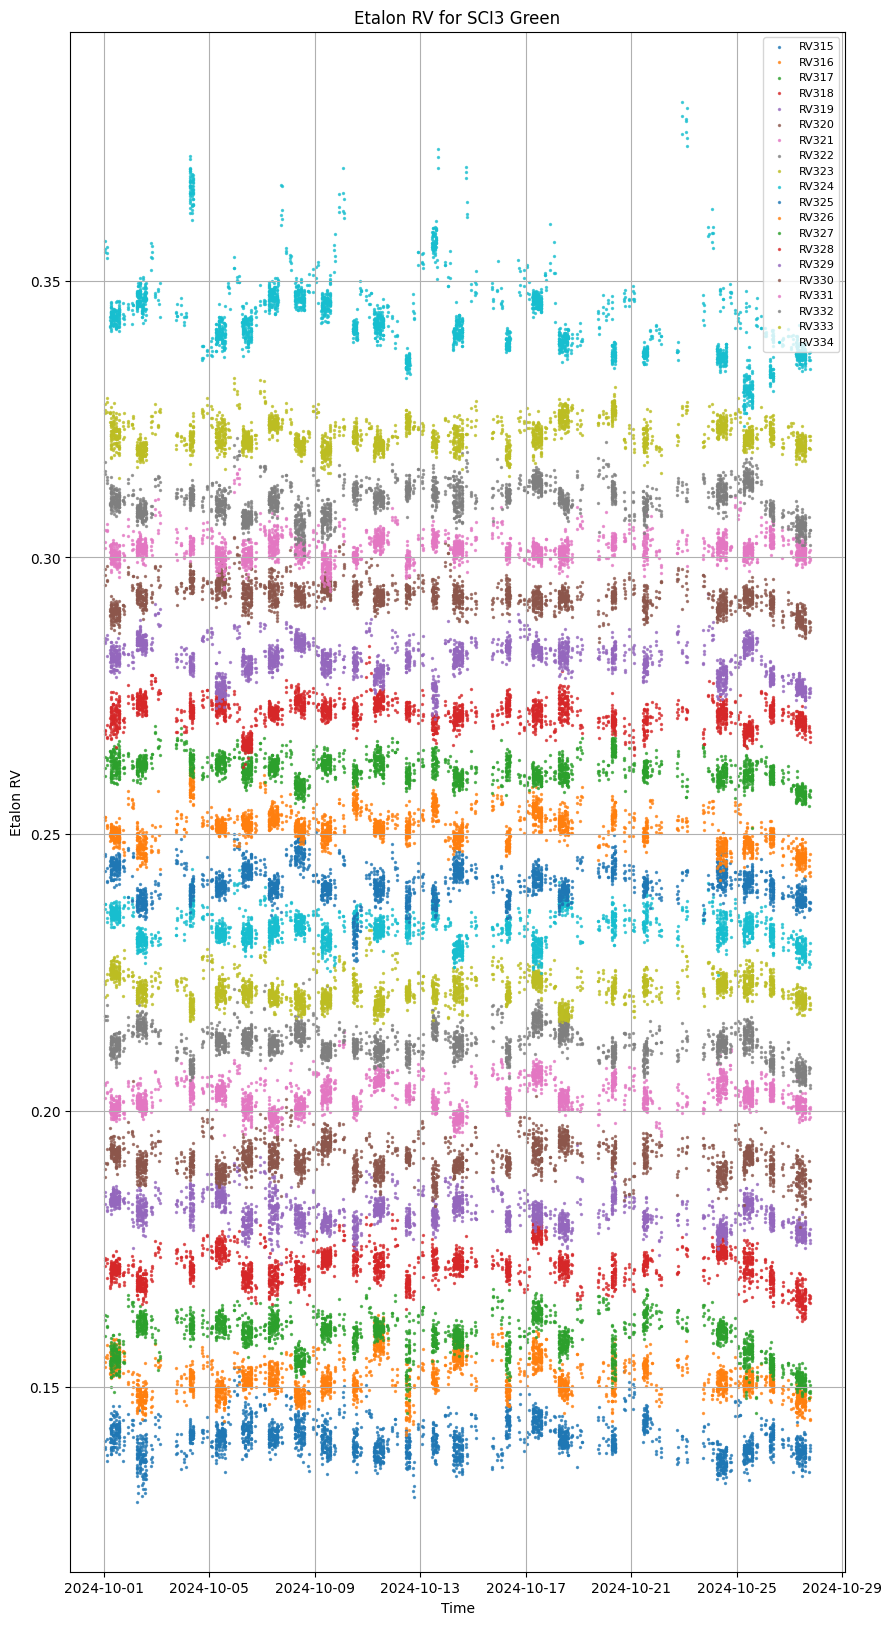

In [41]:
plt.figure(figsize=(10, 20)) 
for i in range(35):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_3_green_df[weight_col] != 0
    times = sci_3_green_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_3_green_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI3 Green")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [42]:
rms_results = []
for i in range(35):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_3_green_df.loc[sci_3_green_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([i, rv_col, rms])

sci_3_green_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_3_green_overall_rms = np.min(sci_3_green_rms_df["RMS"])
sci_3_green_rms_df["RMS Factor"] = (sci_3_green_rms_df["RMS"] - sci_3_green_overall_rms)/sci_3_green_overall_rms + 1
sci_3_green_rms_df["RMS Rank"] = rank_array(sci_3_green_rms_df["RMS"] - sci_3_green_overall_rms)
sci_3_green_rms_df

Order RV Col       RMS  RMS Factor  RMS Rank
0      15  RV315  0.009961    1.335537        18
1      16  RV316  0.008985    1.204695        12
2      17  RV317  0.011710    1.570001        20
3      18  RV318  0.008780    1.177180        11
4      19  RV319  0.009005    1.207292        13
5      20  RV320  0.009357    1.254553        15
6      21  RV321  0.007940    1.064581         3
7      22  RV322  0.008249    1.105935         5
8      23  RV323  0.008635    1.157700         8
9      24  RV324  0.007628    1.022767         2
10     25  RV325  0.009490    1.272422        16
11     26  RV326  0.009571    1.283207        17
12     27  RV327  0.008756    1.173960        10
13     28  RV328  0.008634    1.157596         7
14     29  RV329  0.009184    1.231336        14
15     30  RV330  0.007458    1.000000         1
16     31  RV331  0.008716    1.168556         9
17     32  RV332  0.010176    1.364419        19
18     33  RV333  0.008280    1.110130         6
19     34  RV334  0.008131    1.090155         4

In [43]:
sci_3_green_max_order = sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmax(), "Order"]
sci_3_green_min_order = sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_3_green_max_order}')
print(f'Min: {sci_3_green_min_order}')

Max: 17
Min: 30


# Etalon RV for the SCI3 Fiber Red Wavelengths

In [44]:
unique_cols = set()
unique_cols.add('DATE-MID')
unique_cols.add('NOTJUNK')
unique_cols.add('ObsID')
for i in range (335, 367):
    unique_cols.add(f'RV{i}')
for i in range(35, 67):
    unique_cols.add(f'CCFW{i}')

In [45]:
sci_3_red_df = myTS.dataframe_from_db(unique_cols, 
                          start_date=datetime(2024, 10, 1), end_date=datetime(2024, 10, 31), 
                          object_like=['etalon'], not_junk=True)

sci_3_red_df = sci_3_red_df.drop(columns=['NOTJUNK'])
sci_3_red_df = sci_3_red_df[['DATE-MID'] + ['ObsID'] + [col for col in sci_3_red_df.columns if (col != 'DATE-MID') and (col != 'ObsID')]]
sci_3_red_df.iloc[:, 2:] = sci_3_red_df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
rv_columns = sorted([col for col in sci_3_red_df.columns if col.startswith('RV')], key=lambda x: int(x[2:]))
ccfw_columns = sorted([col for col in sci_3_red_df.columns if col.startswith('CCFW')], key=lambda x: int(x[4:]))
sci_3_red_df = pd.concat([sci_3_red_df['DATE-MID'], sci_3_red_df['ObsID'],sci_3_red_df[rv_columns], sci_3_red_df[ccfw_columns]], axis=1)
sci_3_red_df['DATE-MID'] = pd.to_datetime(sci_3_red_df['DATE-MID'])
sci_3_red_df

DATE-MID                 ObsID RV335     RV336     RV337  \
0    2024-10-01 01:31:52.415  KP.20241001.05482.41   0.0 -0.005495  -0.01242   
1    2024-10-01 01:33:40.948  KP.20241001.05590.94   0.0 -0.003925 -0.003875   
2    2024-10-01 01:35:29.660  KP.20241001.05699.65   0.0 -0.003079 -0.007651   
3    2024-10-01 02:52:11.874  KP.20241001.10301.86   0.0 -0.005506 -0.006705   
4    2024-10-01 02:54:00.323  KP.20241001.10410.31   0.0 -0.006721 -0.012217   
...                      ...                   ...   ...       ...       ...   
2557 2024-10-27 17:33:32.853  KP.20241027.63182.84   0.0 -0.007856 -0.012273   
2558 2024-10-27 17:35:21.291  KP.20241027.63291.25   0.0 -0.009832 -0.012054   
2559 2024-10-27 18:31:40.930  KP.20241027.66670.90   0.0 -0.009377 -0.011763   
2560 2024-10-27 18:33:29.617  KP.20241027.66779.59   0.0 -0.012221 -0.010164   
2561 2024-10-27 18:35:18.259  KP.20241027.66888.25   0.0 -0.009528 -0.010833   

         RV338     RV339     RV340     RV341     RV342  ... CCFW57 CCFW58  \
0    -0.008024 -0.007703 -0.007658  -0.00833 -0.008008  ...    1.0    1.0   
1    -0.006428 -0.009334 -0.009829 -0.006851 -0.006786  ...    1.0    1.0   
2    -0.005739 -0.008747 -0.009509 -0.008725 -0.010362  ...    1.0    1.0   
3    -0.012528 -0.007694 -0.009456 -0.009843   -0.0068  ...    1.0    1.0   
4     -0.00814 -0.007515 -0.009403 -0.007627 -0.008086  ...    1.0    1.0   
...        ...       ...       ...       ...       ...  ...    ...    ...   
2557 -0.011143 -0.009311 -0.009602 -0.014174 -0.013161  ...    1.0    1.0   
2558 -0.013776 -0.011001 -0.011256 -0.014142 -0.012393  ...    1.0    1.0   
2559 -0.012143 -0.009851  -0.00779 -0.011893  -0.01166  ...    1.0    1.0   
2560 -0.011867 -0.008279 -0.010327 -0.012747 -0.010443  ...    1.0    1.0   
2561 -0.012918 -0.007887 -0.008935 -0.015186 -0.011955  ...    1.0    1.0   

     CCFW59 CCFW60 CCFW61 CCFW62 CCFW63 CCFW64 CCFW65 CCFW66  
0       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
1       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
3       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
4       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
...     ...    ...    ...    ...    ...    ...    ...    ...  
2557    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2558    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2559    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2560    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2561    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  

[2562 rows x 66 columns]

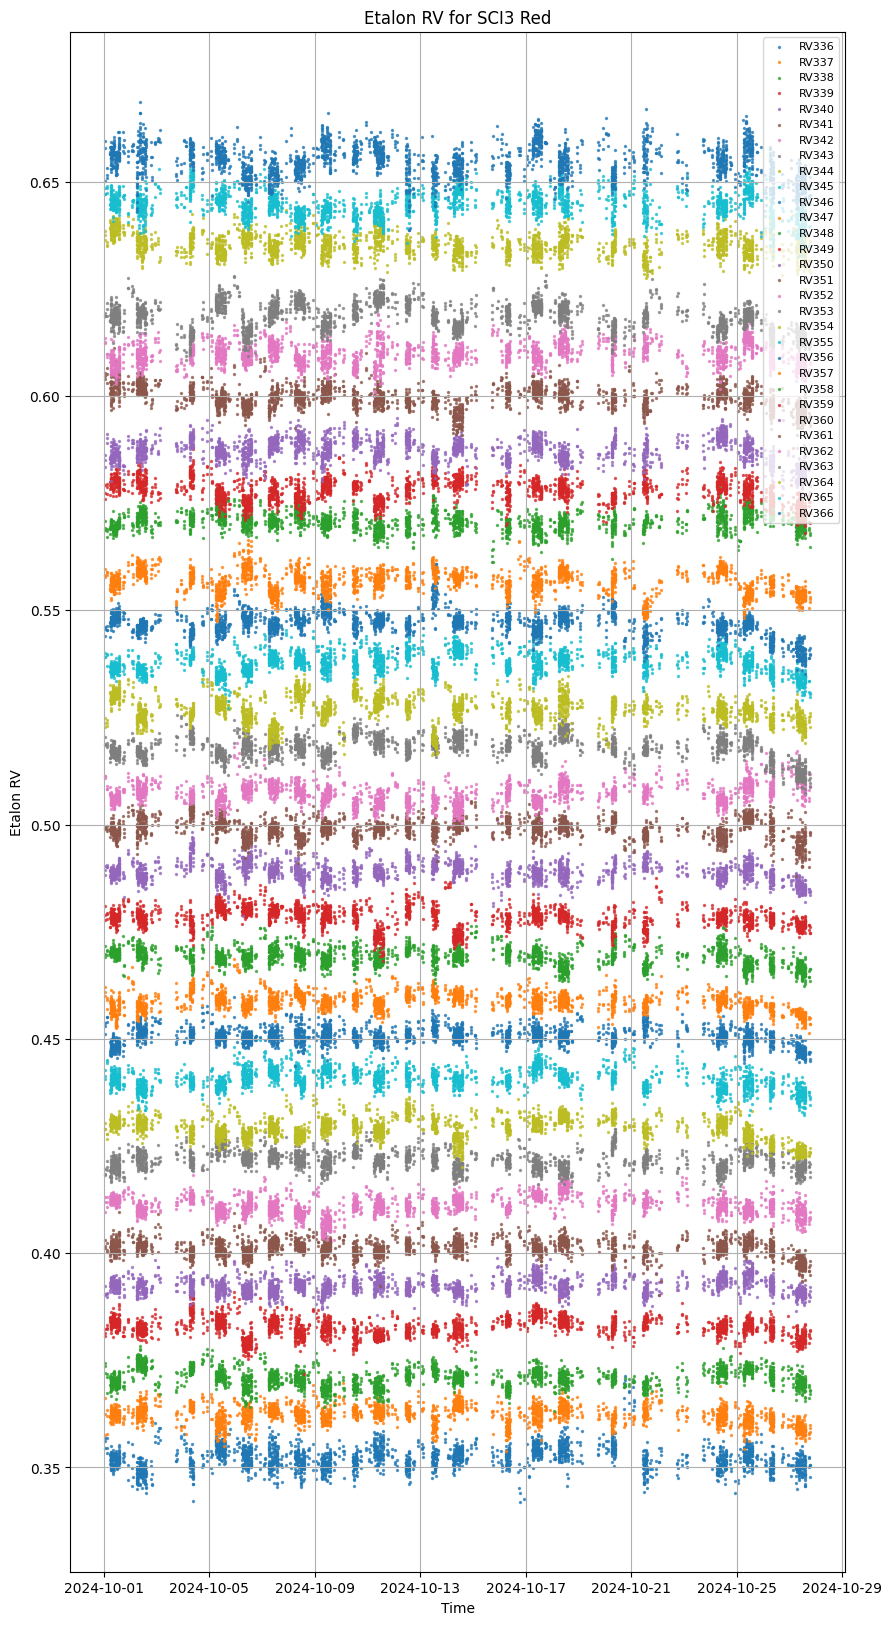

In [46]:
plt.figure(figsize=(10, 20)) 
for i in range(35, 67):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    
    valid_indices = sci_3_red_df[weight_col] != 0
    times = sci_3_red_df.loc[valid_indices, 'DATE-MID']
    rv_values = sci_3_red_df.loc[valid_indices, rv_col]

    if not rv_values.empty:
        plt.scatter(times, rv_values + i * 0.01, label=rv_col, alpha=0.7, s=2)

plt.xlabel("Time")
plt.ylabel("Etalon RV")
plt.title("Etalon RV for SCI3 Red")
plt.legend(fontsize=8) 
plt.grid(True)

plt.show()

In [47]:
rms_results = []
order = 0
for i in range(35, 67):
    rv_col = f"RV{300 + i}"
    weight_col = f"CCFW{str(i).zfill(2)}"
    valid_data = sci_3_red_df.loc[sci_3_red_df[weight_col] != 0, rv_col]
    if not valid_data.empty:
        rms = np.sqrt(np.mean(valid_data**2))
        rms_results.append([order, rv_col, rms])
    order+=1

sci_3_red_rms_df = pd.DataFrame(rms_results, columns=["Order", "RV Col", "RMS"])
sci_3_red_overall_rms = np.min(sci_3_red_rms_df["RMS"])
sci_3_red_rms_df["RMS Factor"] = (sci_3_red_rms_df["RMS"] - sci_3_red_overall_rms)/sci_3_red_overall_rms + 1
sci_3_red_rms_df["RMS Rank"] = rank_array(sci_3_red_rms_df["RMS"] - sci_3_red_overall_rms)
sci_3_red_rms_df

Order RV Col       RMS  RMS Factor  RMS Rank
0       1  RV336  0.008290    1.573204         7
1       2  RV337  0.008044    1.526579         6
2       3  RV338  0.009368    1.777854        11
3       4  RV339  0.007649    1.451656         4
4       5  RV340  0.007766    1.473823         5
5       6  RV341  0.008976    1.703362         9
6       7  RV342  0.009192    1.744510        10
7       8  RV343  0.008668    1.645032         8
8       9  RV344  0.011241    2.133195        19
9      10  RV345  0.009716    1.843806        14
10     11  RV346  0.009519    1.806539        13
11     12  RV347  0.011503    2.182945        21
12     13  RV348  0.011135    2.113133        17
13     14  RV349  0.012026    2.282203        23
14     15  RV350  0.011244    2.133829        20
15     16  RV351  0.011225    2.130311        18
16     17  RV352  0.012970    2.461471        28
17     18  RV353  0.012368    2.347077        25
18     19  RV354  0.013561    2.573578        30
19     20  RV355  0.012564    2.384311        26
20     21  RV356  0.013450    2.552546        29
21     22  RV357  0.013634    2.587432        31
22     23  RV358  0.009493    1.801589        12
23     24  RV359  0.012352    2.344144        24
24     25  RV360  0.012962    2.459896        27
25     26  RV361  0.010657    2.022403        16
26     27  RV362  0.010558    2.003610        15
27     28  RV363  0.011923    2.262616        22
28     29  RV364  0.005269    1.000000         1
29     30  RV365  0.006247    1.185451         2
30     31  RV366  0.006598    1.252121         3

In [48]:
sci_3_red_max_order = sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmax(), "Order"]
sci_3_red_min_order = sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmin(), "Order"]
print(f'Max: {sci_3_red_max_order}')
print(f'Min: {sci_3_red_min_order}')

Max: 22
Min: 29


# Overall Results

In [49]:
dict_rms = {'SCI Fiber': ['Green SCI1', 'Green SCI2', 'Green SCI3', 'Red SCI1', 'Red SCI2', 'Red SCI3'], 
            'Max Order': [sci_1_green_max_order, sci_2_green_max_order, sci_3_green_max_order, sci_1_red_max_order, sci_2_red_max_order, sci_3_red_max_order],
            'Min Order': [sci_1_green_min_order, sci_2_green_min_order, sci_3_green_min_order, sci_1_red_min_order, sci_2_red_min_order, sci_3_red_min_order],
            'Max RMS(km/s rms)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmax(), "RMS"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmax(), "RMS"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmax(), "RMS"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmax(), "RMS"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmax(), "RMS"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmax(), "RMS"]],
            'Max Deviation(km/s rms + 1)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmax(), "RMS Factor"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmax(), "RMS Factor"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmax(), "RMS Factor"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmax(), "RMS Factor"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmax(), "RMS Factor"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmax(), "RMS Factor"]],
            'Min RMS(km/s rms)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmin(), "RMS"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmin(), "RMS"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmin(), "RMS"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmin(), "RMS"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmin(), "RMS"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmin(), "RMS"]],
            'Min Deviation(km/s rms + 1)':[sci_1_green_rms_df.loc[sci_1_green_rms_df["RMS Rank"].idxmin(), "RMS Factor"], sci_2_green_rms_df.loc[sci_2_green_rms_df["RMS Rank"].idxmin(), "RMS Factor"],
                             sci_3_green_rms_df.loc[sci_3_green_rms_df["RMS Rank"].idxmin(), "RMS Factor"], sci_1_red_rms_df.loc[sci_1_red_rms_df["RMS Rank"].idxmin(), "RMS Factor"],
                             sci_2_red_rms_df.loc[sci_2_red_rms_df["RMS Rank"].idxmin(), "RMS Factor"], sci_3_red_rms_df.loc[sci_3_red_rms_df["RMS Rank"].idxmin(), "RMS Factor"]]}
rms_overall = pd.DataFrame.from_dict(dict_rms)
rms_overall

SCI Fiber  Max Order  Min Order  Max RMS(km/s rms)  \
0  Green SCI1         17         34           0.010261   
1  Green SCI2         17         34           0.008327   
2  Green SCI3         17         30           0.011710   
3    Red SCI1         31         24           0.011136   
4    Red SCI2         31          5           0.004127   
5    Red SCI3         22         29           0.013634   

   Max Deviation(km/s rms + 1)  Min RMS(km/s rms)  Min Deviation(km/s rms + 1)  
0                     2.044750           0.005018                          1.0  
1                     1.673068           0.004977                          1.0  
2                     1.570001           0.007458                          1.0  
3                     2.981164           0.003736                          1.0  
4                     2.150399           0.001919                          1.0  
5                     2.587432           0.005269                          1.0